<a href="https://colab.research.google.com/github/syedtariqshah789/ML_Projects/blob/main/Data_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syedtariqshah","key":"59e55a5ffcf71f2ba9656d6a5eedeff8"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d fazilbtopal/auto85

  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 17.5MB/s]


In [4]:
!unzip auto85.zip

Archive:  auto85.zip
  inflating: auto.csv                
  inflating: auto_clean.csv          


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy
import numpy as np
import seaborn as sns

In [6]:
df= pd.read_csv('auto.csv',header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
df.columns=["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [8]:
df.replace('?',np.nan,inplace=True)

In [9]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
df['normalized-losses']=df['normalized-losses'].astype('float')
df[['bore','stroke','horsepower','peak-rpm','price']]=df[['bore','stroke','horsepower','peak-rpm','price']].astype('float')

In [11]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print('')


symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [12]:
df.dropna(subset=['price'],axis=0,inplace=True)

In [13]:
df.reset_index(drop=True,inplace=True)

In [14]:
df['normalized-losses'].replace(np.nan,df['normalized-losses'].mean(),inplace=True)

In [15]:
df['stroke'].replace(np.nan,df['stroke'].mean(),inplace=True)
df['horsepower'].replace(np.nan,df['horsepower'].mean(),inplace=True)
df['peak-rpm'].replace(np.nan,df['peak-rpm'].mean(),inplace=True)

In [16]:
df['bore'].replace(np.nan,df['bore'].mean(),inplace=True)

In [17]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [18]:
df['num-of-doors'].replace(np.nan,'four',inplace=True)

In [19]:
df['city-L/100km']=235/df['city-mpg']
df['highway-L/100km']=235/df['highway-mpg']

In [20]:
df['length']=df['length']/df['length'].max()
df['width']=df['width']/df['width'].max()
df['height']=df['height']/df['height'].max()

In [21]:
df.to_csv('/content/drive/MyDrive/clean_data.csv',index=False)

In [22]:
df1=pd.read_csv('/content/drive/MyDrive/clean_data.csv')

In [23]:
df1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818


In [24]:
df2=pd.get_dummies(df1['body-style'])

In [25]:
df1=pd.concat([df1,df2],axis=1)

In [26]:
df1=pd.concat([df1,pd.get_dummies(df1['num-of-doors'])],axis=1)

In [27]:
df1=pd.concat([df1,pd.get_dummies(df1['fuel-type'])],axis=1)

In [28]:
df1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)

In [29]:
df1.rename(columns={'four':'num-of-door-four','two':'num-of-door-two'},inplace=True)

In [30]:
df1.rename(columns={'convertible':'body-style-convertible','hardtop':'body-style-hardtop','hatchback':'body-style-hatchback','sedan':'body-style-sedan','wagon':'body-style-wagon'},inplace=True)

In [31]:
df1.drop('num-of-doors',axis=1,inplace=True)

In [32]:
df1.drop('fuel-type',axis=1,inplace=True)

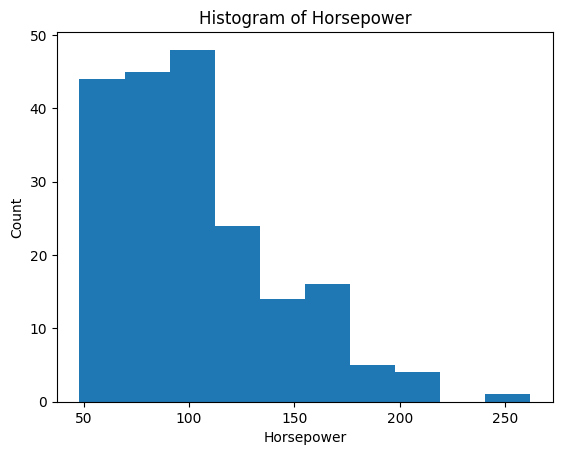

In [33]:
plt.hist(df1['horsepower'])
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.title('Histogram of Horsepower')
plt.show()

In [34]:
bins=np.linspace(min(df1['horsepower']),max(df1['horsepower']),4)

In [35]:
group_names=['Low','Medium','High']

In [36]:
df1['horsepower-binned']=pd.cut(df1['horsepower'],bins,labels=group_names,include_lowest=True)

<BarContainer object of 3 artists>

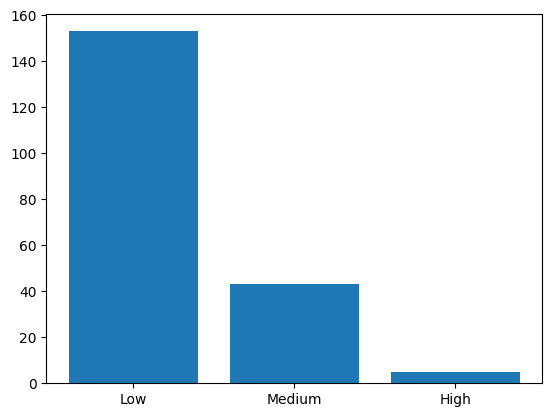

In [37]:
plt.bar(group_names,df1['horsepower-binned'].value_counts())

(array([153.,  43.,   5.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

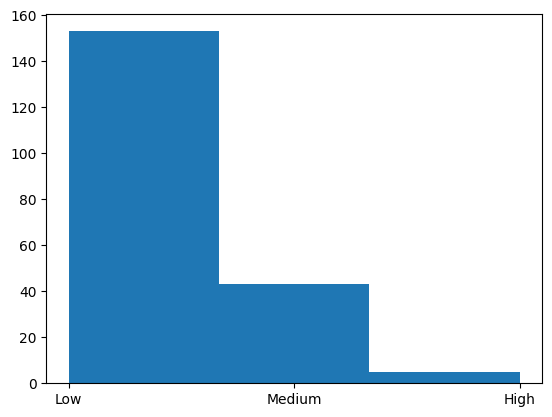

In [38]:
plt.hist(df1['horsepower-binned'],bins=3)

(array([140.,  55.,   6.]),
 array([ 65.        , 128.66666667, 192.33333333, 256.        ]),
 <BarContainer object of 3 artists>)

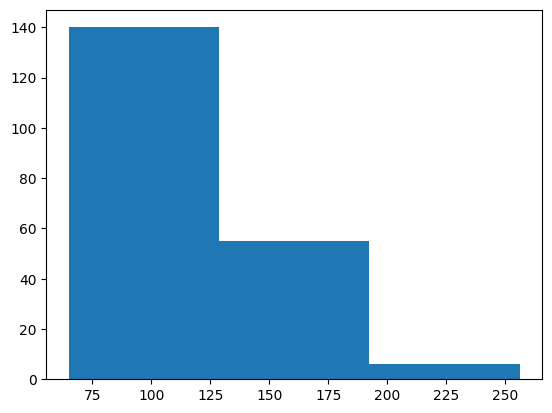

In [39]:
plt.hist(df1['normalized-losses'],bins=3)


In [40]:
df1.to_csv('/content/drive/MyDrive/clean_data.csv',index=False)

In [41]:
df2=pd.read_csv('/content/drive/MyDrive/clean_data.csv')
df2.head()

,symboling,normalized-losses,make,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,...,body-style-convertible,body-style-hardtop,body-style-hatchback,body-style-sedan,body-style-wagon,num-of-door-four,num-of-door-two,fuel-type-diesel,fuel-type-gas,horsepower-binned
0,3,122.0,alfa-romero,std,convertible,rwd,front,88.6,0.811148,0.890278,...,1,0,0,0,0,0,1,0,1,Low
1,3,122.0,alfa-romero,std,convertible,rwd,front,88.6,0.811148,0.890278,...,1,0,0,0,0,0,1,0,1,Low
2,1,122.0,alfa-romero,std,hatchback,rwd,front,94.5,0.822681,0.909722,...,0,0,1,0,0,0,1,0,1,Medium
3,2,164.0,audi,std,sedan,fwd,front,99.8,0.848630,0.919444,...,0,0,0,1,0,1,0,0,1,Low
4,2,164.0,audi,std,sedan,4wd,front,99.4,0.848630,0.922222,...,0,0,0,1,0,1,0,0,1,Low


In [42]:
df_corr=df2.corr()

<ipython-input-42-27adc4b1852a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df2.corr()


(0.0, 53120.61639410839)

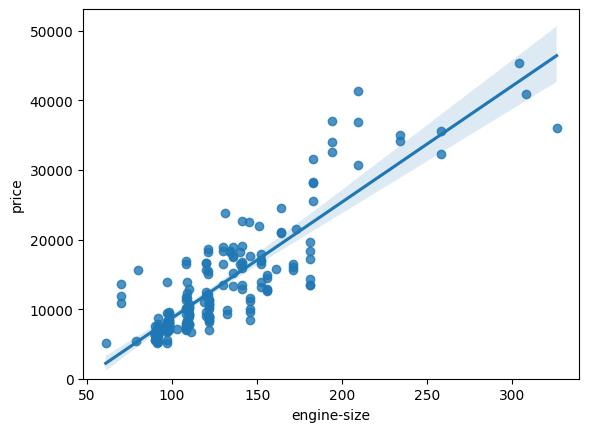

In [43]:
sns.regplot(x='engine-size',y='price',data=df2)
plt.ylim(0,)

In [44]:
df2[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='engine-location', ylabel='price'>

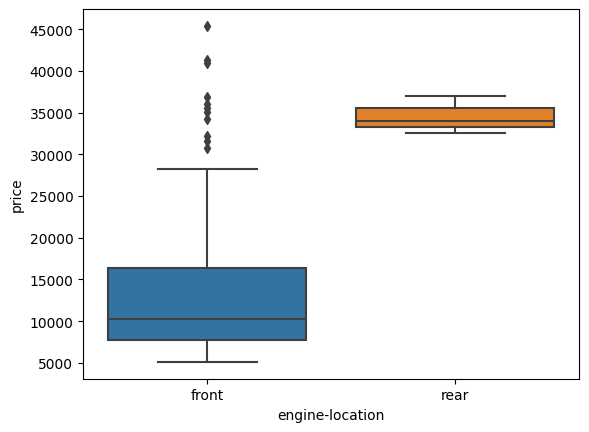

In [45]:
sns.boxplot(x='engine-location',y='price',data=df2)

<Axes: xlabel='drive-wheels', ylabel='price'>

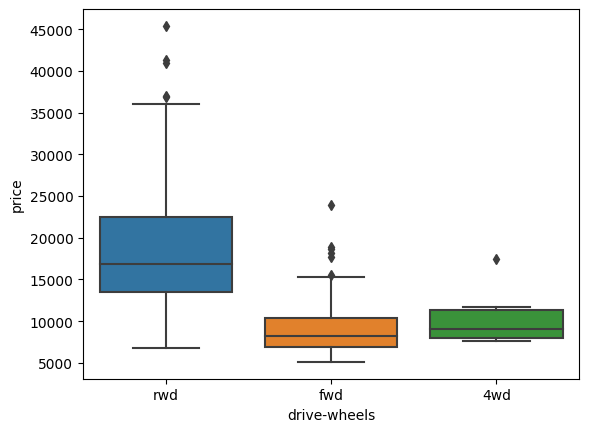

In [46]:
sns.boxplot(x='drive-wheels',y='price',data=df2)

In [47]:
drive_wheel_count=df2['drive-wheels'].value_counts().to_frame()

In [48]:
drive_wheel_count.rename(columns={'drive-wheels':'value_count'},inplace=True)

In [49]:
drive_wheel_count.index.name='drive-wheels'
drive_wheel_count

,value_count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [50]:
df2['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [51]:
group1=df2[['drive-wheels','engine-location','price']]
group1

,drive-wheels,engine-location,price
0,rwd,front,13495.0
1,rwd,front,16500.0
2,rwd,front,16500.0
3,fwd,front,13950.0
4,4wd,front,17450.0
...,...,...,...
196,rwd,front,16845.0
197,rwd,front,19045.0
198,rwd,front,21485.0
199,rwd,front,22470.0


In [52]:
group2=group1.groupby(['drive-wheels'],as_index=False).mean()
group2

<ipython-input-52-115ed06ea393>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group2=group1.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [53]:
group3=group1.groupby(['engine-location'],as_index=False).mean()
group3

<ipython-input-53-937c42ab9a37>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group3=group1.groupby(['engine-location'],as_index=False).mean()


,engine-location,price
0,front,12884.085859
1,rear,34528.000000


In [54]:
group4=group1.groupby(['drive-wheels','engine-location'],as_index=False).mean()
group4

,drive-wheels,engine-location,price
0,4wd,front,10241.000000
1,fwd,front,9244.779661
2,rwd,front,19142.180556
3,rwd,rear,34528.000000


In [55]:
group4_pivot=group4.pivot(index='drive-wheels',columns='engine-location')
group4_pivot

price         
engine-location         front     rear
drive-wheels                          
4wd              10241.000000      NaN
fwd               9244.779661      NaN
rwd              19142.180556  34528.0

In [56]:
group4_pivot=group4_pivot.fillna(0)
group4_pivot.columns
#group4_pivot.shape

MultiIndex([('price', 'front'),
            ('price',  'rear')],
           names=[None, 'engine-location'])

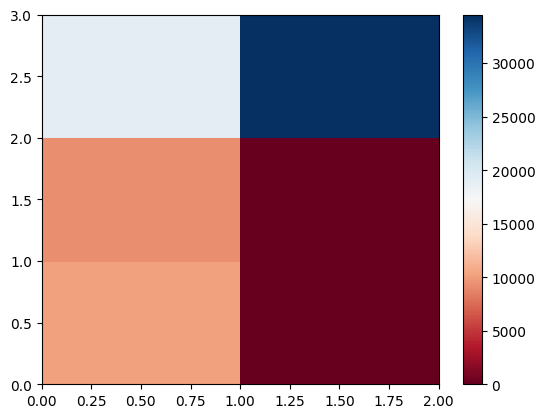

In [57]:
plt.pcolor(group4_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

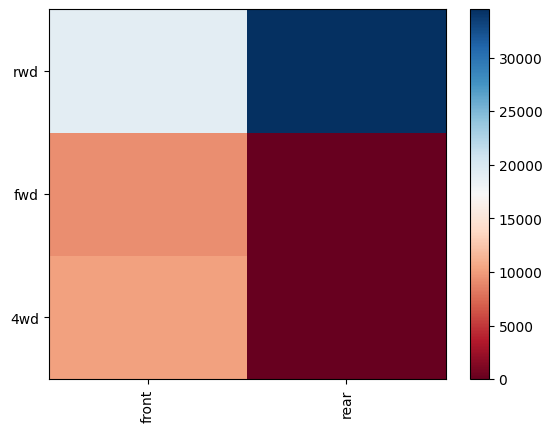

In [58]:
fig, ax = plt.subplots()
im = ax.pcolor(group4_pivot, cmap='RdBu')

#label names
row_labels = group4_pivot.columns.levels[1]
col_labels = group4_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group4_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group4_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [59]:
from scipy import stats
pearson_coef,p_value=stats.pearsonr(df2['wheel-base'],df2['price'])
print(pearson_coef)
print(p_value)

0.584641822265508
8.076488270732885e-20


In [60]:
pears,p=stats.pearsonr(df2['horsepower'],df2['price'])
print(pears)
print(p)

0.8096811975632288
6.05844464971006e-48


In [61]:
group5=df2[['drive-wheels', 'price']].groupby(['drive-wheels'])

In [62]:
group5.get_group('fwd')['price']

3      13950.0
5      15250.0
6      17710.0
7      18920.0
8      23875.0
        ...   
185    11595.0
186     9980.0
187    13295.0
188    13845.0
189    12290.0
Name: price, Length: 118, dtype: float64

In [63]:
f_val,p_val=stats.f_oneway(group5.get_group('fwd')['price'],group5.get_group('rwd')['price'])
print(f_val,p_val)

130.5533160959111 2.2355306355677845e-23


In [64]:
f_val,p_val=stats.f_oneway(group5.get_group('fwd')['price'],group5.get_group('rwd')['price'],group5.get_group('4wd')['price'])
print(f_val,p_val)

67.95406500780399 3.3945443577151245e-23


In [65]:
f_val,p_val=stats.f_oneway(group5.get_group('fwd')['price'],group5.get_group('4wd')['price'])
print(f_val,p_val)

0.6654657502523033 0.41620116697845666


In [66]:
f_val,p_val=stats.f_oneway(group5.get_group('4wd')['price'],group5.get_group('rwd')['price'])
print(f_val,p_val)

8.580681368924756 0.004411492211225333


In [67]:
cont_table=np.array([[7,13],[161,24]])
cont_table

array([[  7,  13],
       [161,  24]])

In [68]:
stats.chi2_contingency(cont_table,correction=True)

Chi2ContingencyResult(statistic=29.605759385109046, pvalue=5.2947382636786724e-08, dof=1, expected_freq=array([[ 16.3902439,   3.6097561],
       [151.6097561,  33.3902439]]))